<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-первому-этапу" data-toc-modified-id="Выводы-по-первому-этапу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по первому этапу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-второму-этапу" data-toc-modified-id="Выводы-по-второму-этапу-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по второму этапу</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-третьему-этапу" data-toc-modified-id="Выводы-по-третьему-этапу-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы по третьему этапу</a></span></li></ul></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговые выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

# Recovery of gold from ore

Подготовьте прототип модели машинного обучения для компании. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

________________________________________________________________________________________________________________________________

Prepare a prototype machine learning model for the company. The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore. Use data with mining and cleaning parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

You need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

To complete the project, refer to *pandas*, *matplotlib* and *sklearn.* libraries, their documentation will help you.

## Подготовка данных

## Data preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

Подключаем дата фреймы к проекту.

We connect data frames to the project.

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
gold_recovery_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
gold_recovery_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
gold_recovery_train.set_index('date', inplace = True)
gold_recovery_test.set_index('date', inplace = True)
gold_recovery_full.set_index('date', inplace = True)

Проверяем данные на предмет наличия нулевых значений и пропусков.

We check the data for the presence of zero values and gaps.

In [7]:
gold_recovery_train.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [8]:
gold_recovery_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [9]:
gold_recovery_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [10]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(35,16), rot = -5, legend = False, fontsize = 16)
            .set_title('Количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

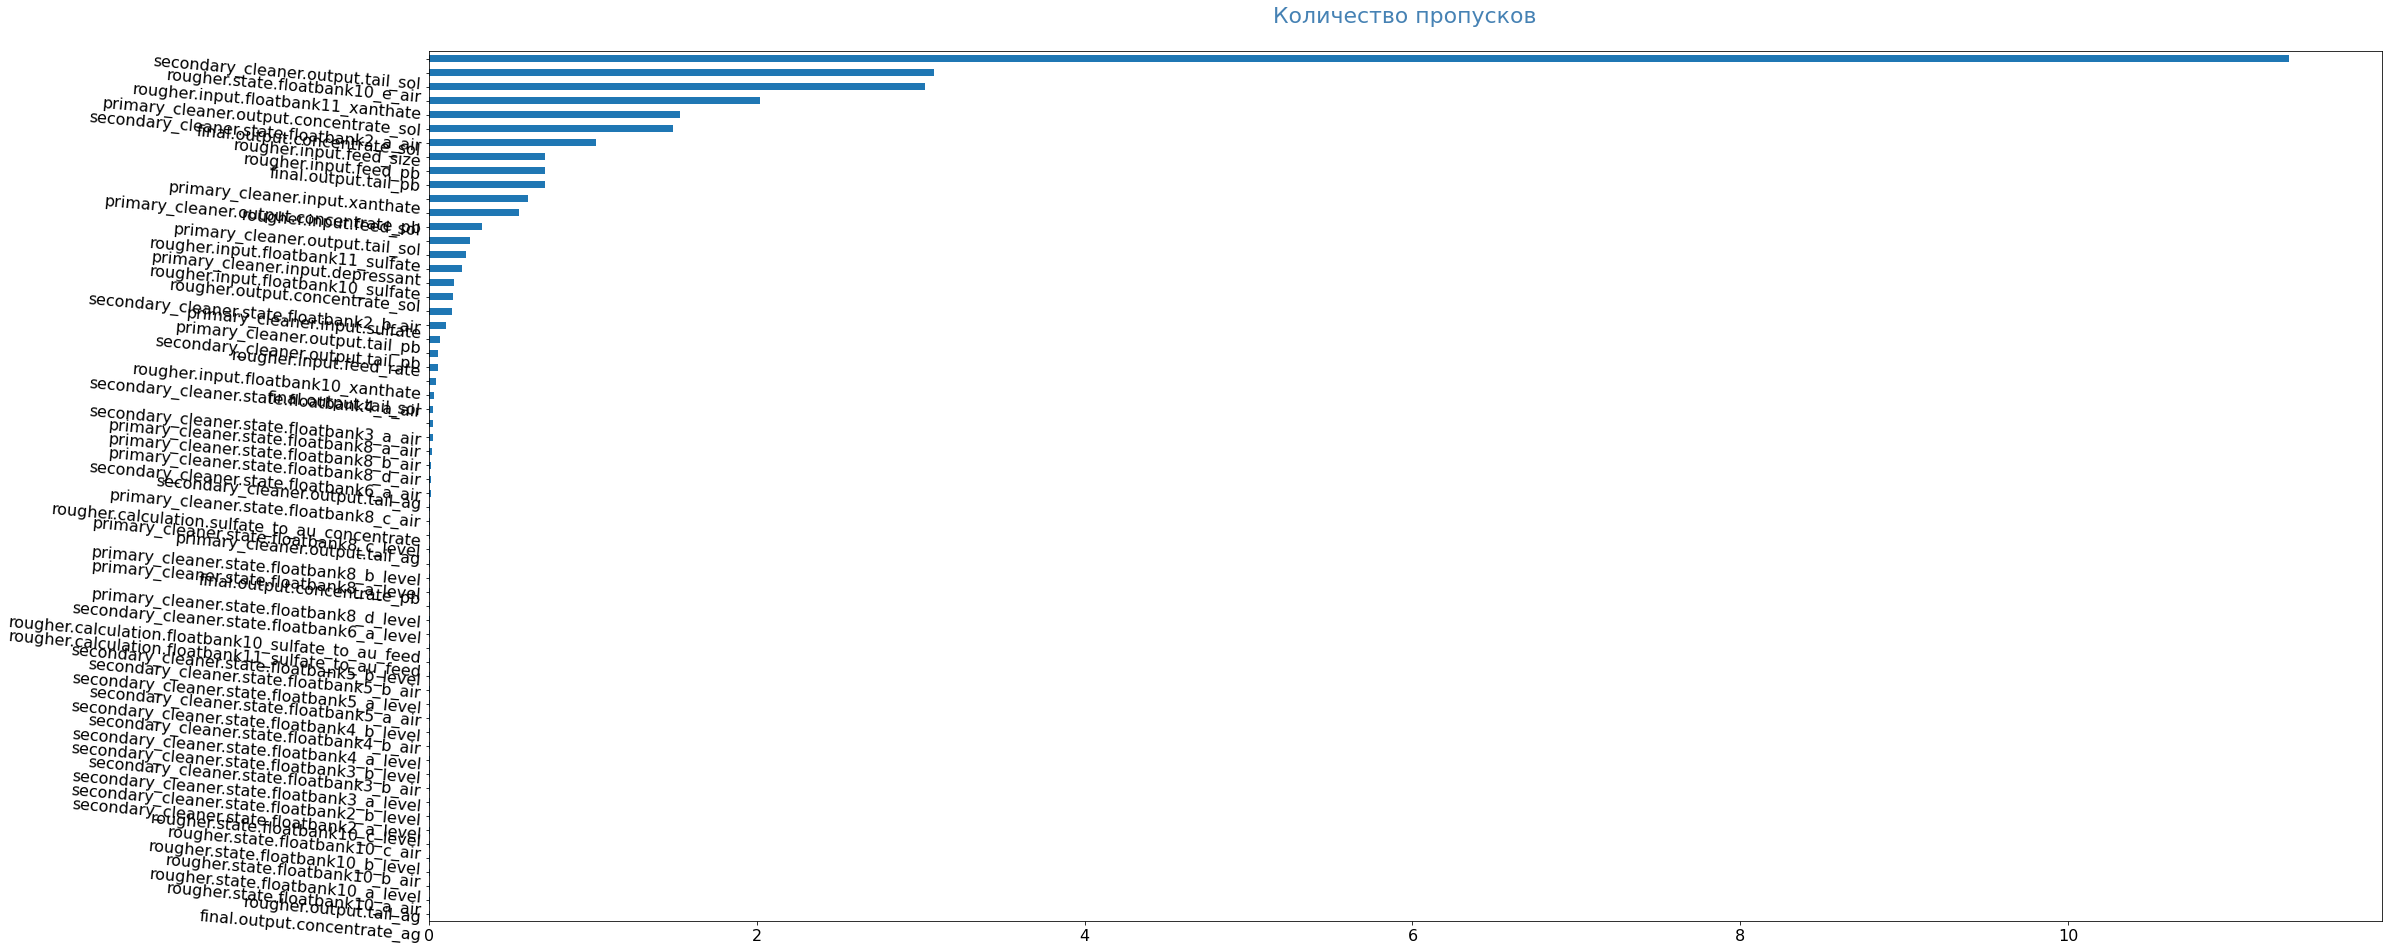

In [11]:
pass_value_barh(gold_recovery_train)

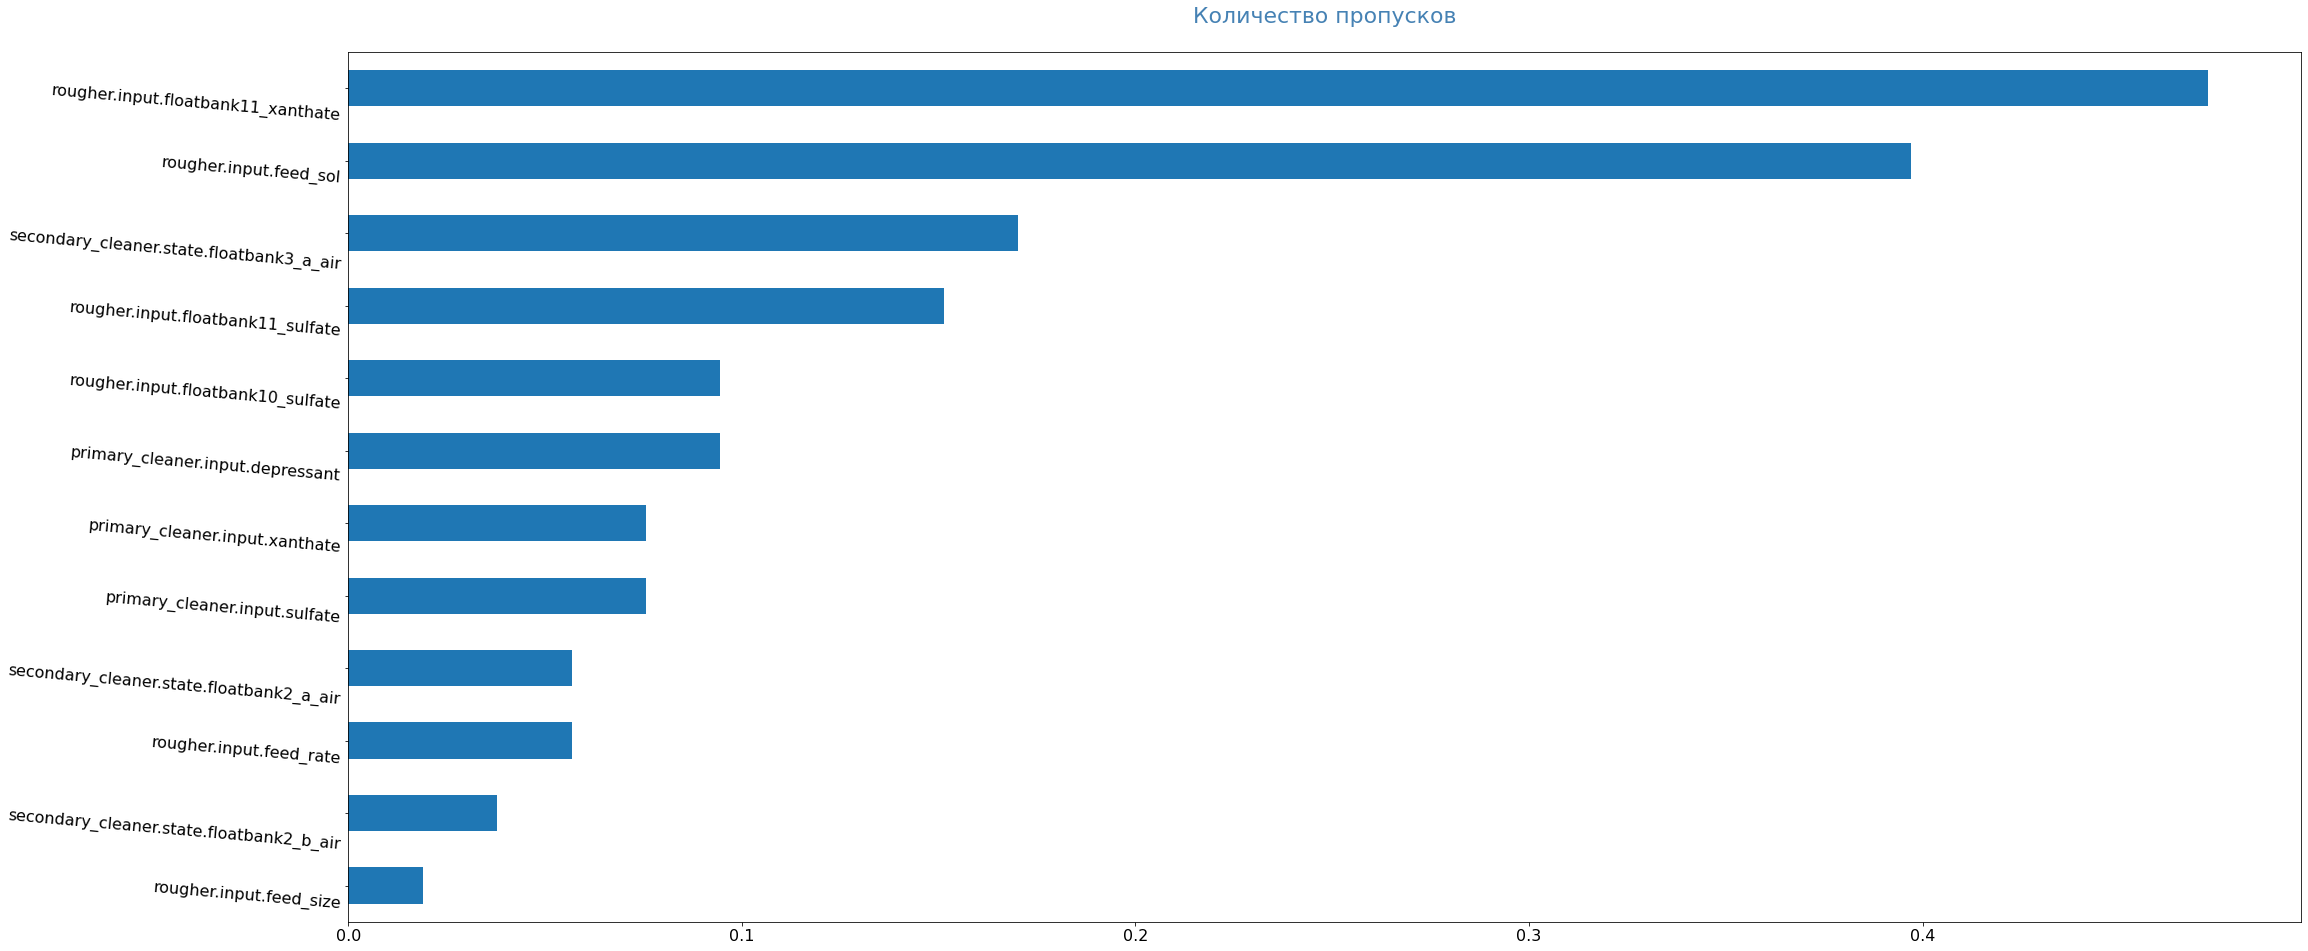

In [12]:
pass_value_barh(gold_recovery_test)

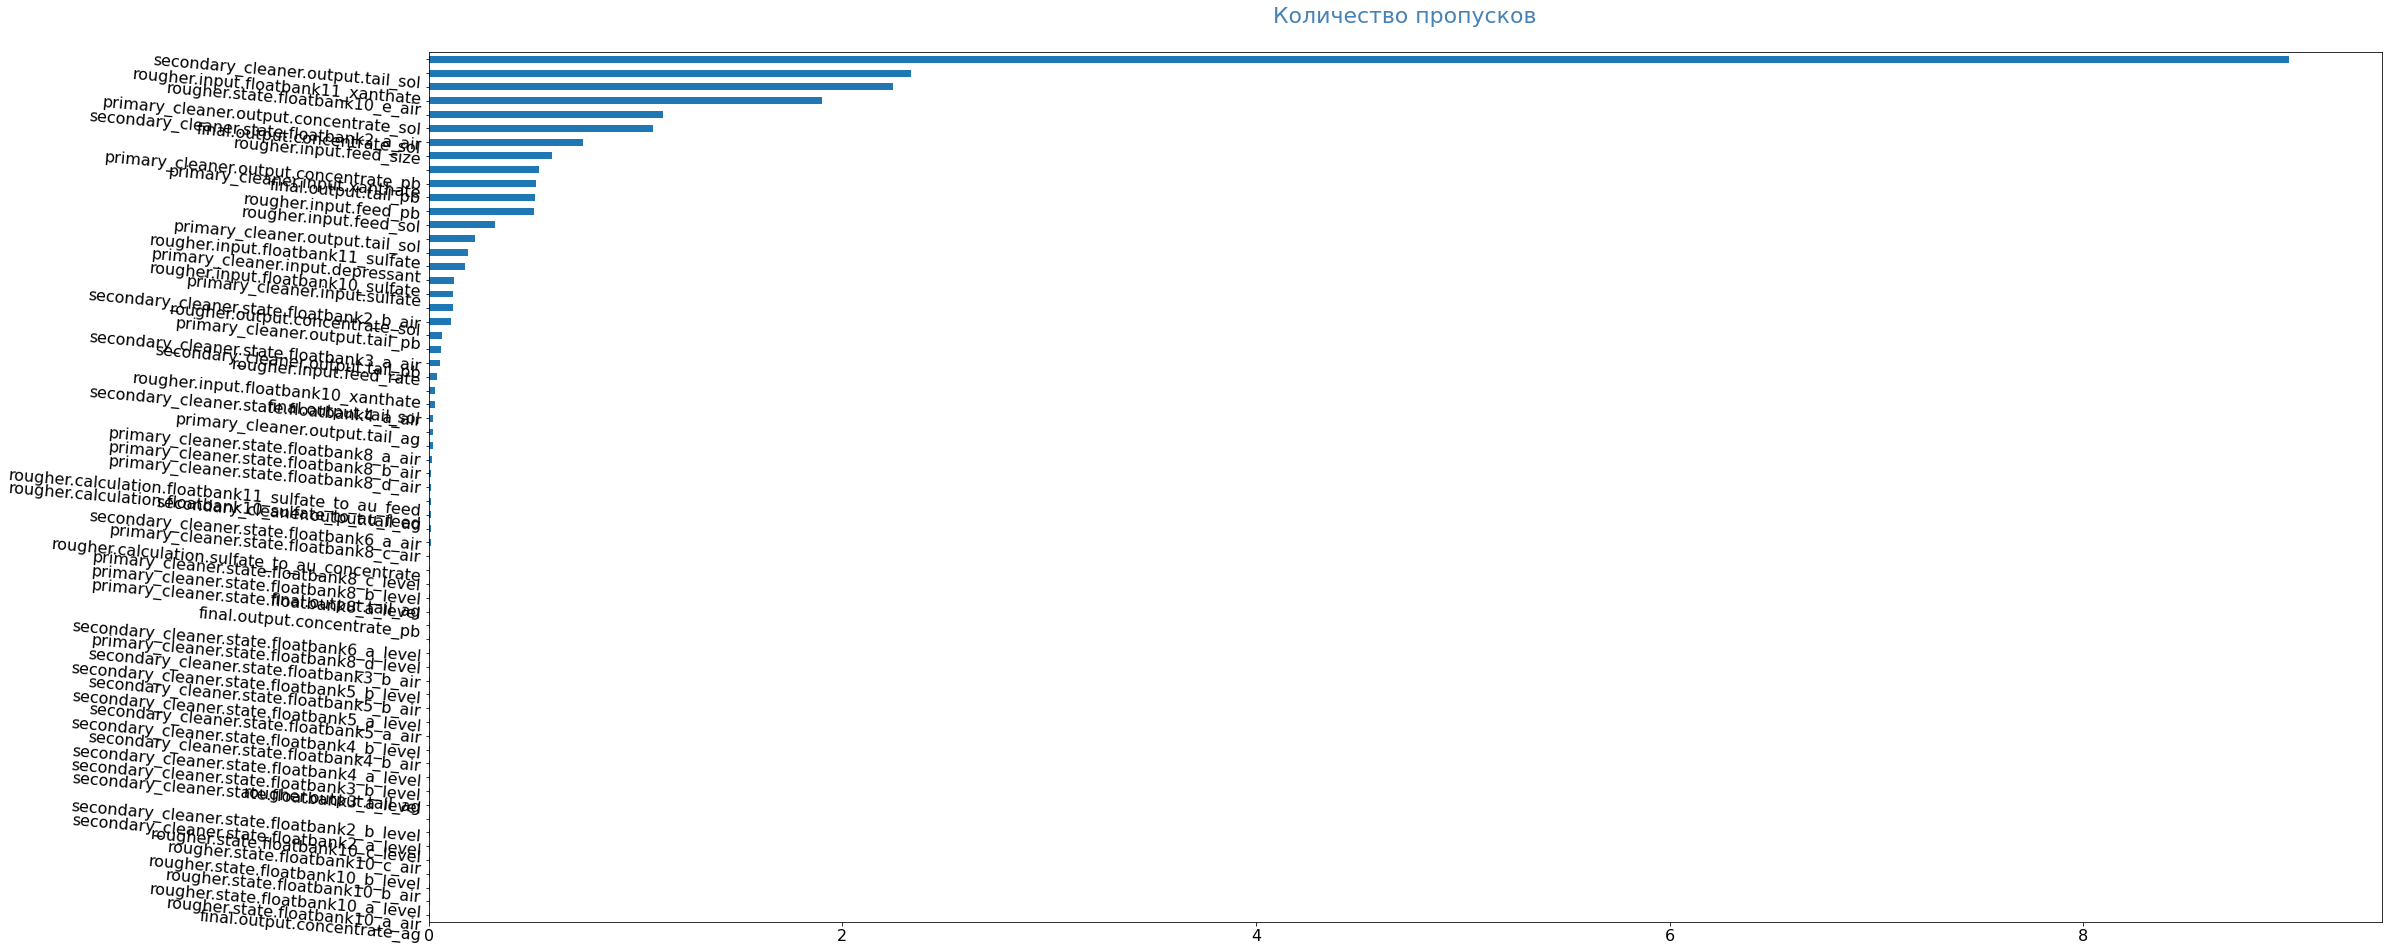

In [13]:
pass_value_barh(gold_recovery_full)

In [14]:
def check_columns(data_frame):
    for col in data_frame.select_dtypes(include='object').columns:
        print('Уникальные значения столбца', col)
        print(data_frame[col].unique(), '\n')
        
check_columns(gold_recovery_train)
check_columns(gold_recovery_test)
check_columns(gold_recovery_full)

Удаляем пропуски из столбцов.

Remove gaps from columns.

In [7]:
gold_recovery_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)

good_gold_recovery_train = gold_recovery_train.dropna()

good_gold_recovery_test = gold_recovery_test.dropna()

Рассчитаем эффективность обогащения чернового концентрата rougher.output.recovery из обучающей выборки с помощью метрики MAE.

Let's calculate the enrichment efficiency of the rough concentrate rougher.output.recovery from the training set using the MAE metric.

In [8]:
concentrate_au_column = gold_recovery_train['rougher.output.concentrate_au']
feed_au_column = gold_recovery_train['rougher.input.feed_au']
tail_au_column = gold_recovery_train['rougher.output.tail_au']
input_recovery = gold_recovery_train['rougher.output.recovery']
calculated_recovery = concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column / (concentrate_au_column - tail_au_column) * 100
print('MAE =', mean_absolute_error(input_recovery, calculated_recovery))

MAE = 1.0748911125799084e-14


Выделим столбцы из тестовой выборки, по которым будет обучаться модель. Для предсказания rougher.output.recovery будут использоватся данные из стобцов этапа rougher. Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.

Select the columns from the test set, on which the model will be trained. To predict rougher.output.recovery, the data from the columns of the rougher stage will be used. All columns from the test set will be used to calculate final.output.recovery.

In [9]:
features_columns = good_gold_recovery_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)

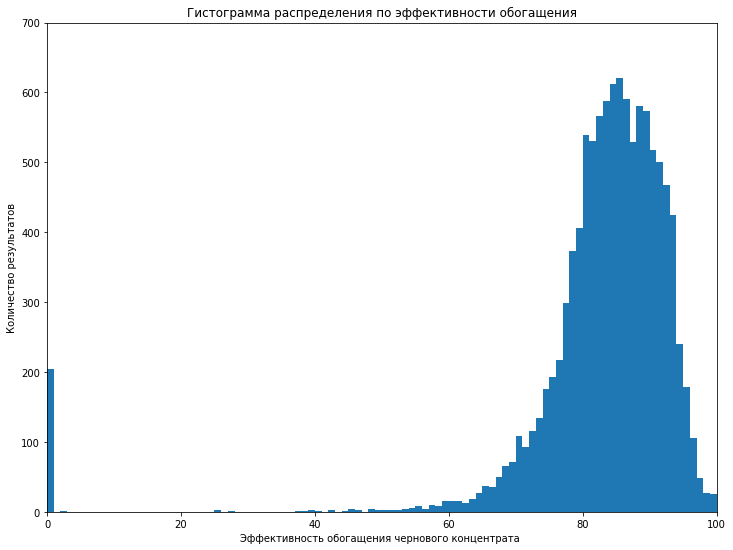

In [18]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Изучим нулевые значения в столбце rougher.output.recovery.

Let's examine the null values in the rougher.output.recovery column.

In [19]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,118.895031,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,126.796059,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,223.382947,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [20]:
good_gold_recovery_train[good_gold_recovery_train['rougher.output.concentrate_au'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,118.895031,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,126.796059,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,223.382947,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


В данных нет информации о этапе rougher. Удалим эти значения, так как они могут исказить данные.

There is no information about the rougher stage in the data. Let's remove these values, as they can distort the data.

In [21]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['rougher.output.recovery'] < 1].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


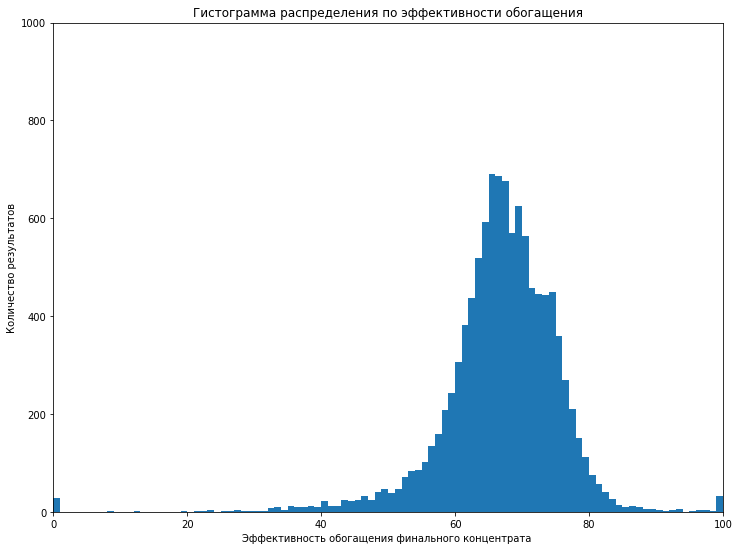

In [22]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Распределение стало ближе к нормальному. 

Проверим есть ли нулевые значения в primary_cleaner.output и secondary_cleaner.output.

The distribution became closer to normal.

Let's check if there are null values in primary_cleaner.output and secondary_cleaner.output.

In [23]:
good_gold_recovery_train[good_gold_recovery_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [24]:
good_gold_recovery_train[good_gold_recovery_train['secondary_cleaner.output.tail_au'] < 1]['secondary_cleaner.output.tail_au'].count()

427

По данным этапам тоже присутвуют нулевые значения. Но так как они не являются целью модели и не входят в список столбцов обучающей модели, оставим их без изменения.

According to these stages, zero values are also present. But since they are not the target of the model and are not included in the list of columns of the training model, we will leave them unchanged.

### Выводы по первому этапу

### Conclusions on the first stage

В данных присутвовали аномалии:

- Пропущенные значение
- Нулевые значения на ключевых этапах

Неподходящие данные были удалены.

Данные готовы к дальнейшему анализу.

________________________________________________________________________________________________________________________________

There were anomalies in the data:

- Missing value
- Zero values at key milestones

Inappropriate data has been removed.

The data is ready for further analysis.

## Анализ данных

## Data analysis

Рассмотрим концентрацию веществ на каждом этапе.

Consider the concentration of substances at each stage.

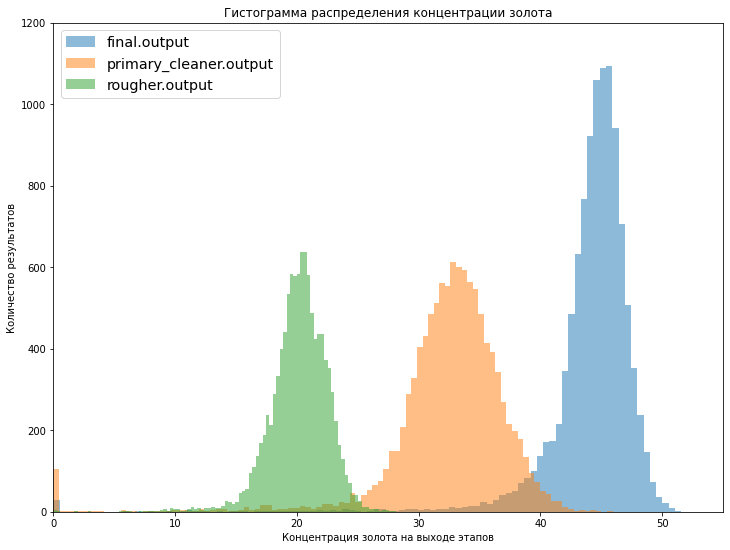

In [25]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 1200])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

Концентрация золота повышается с каждым этапом.

The concentration of gold increases with each stage.

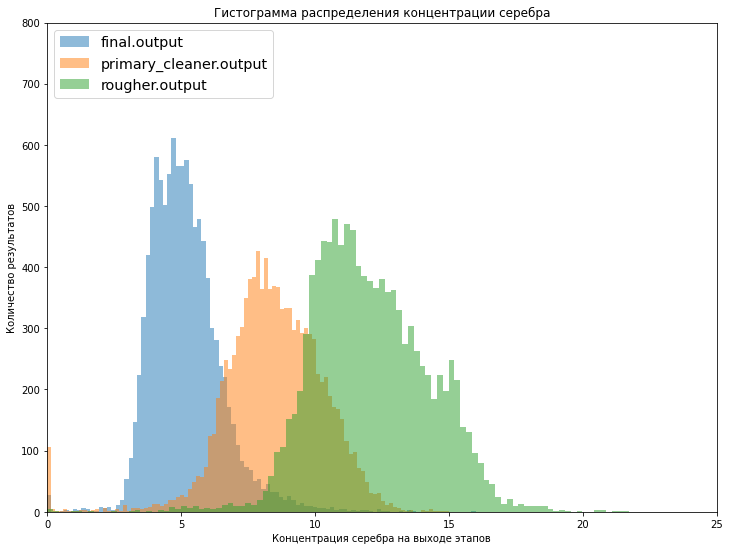

In [26]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 800])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Конецентрация серебра понижается с каждым шагом очистки. Так как целью добычи является золото, то остальные металлы и соединения должны быть отфильтрованы.

The silver concentration decreases with each purification step. Since the purpose of mining is gold, the rest of the metals and compounds must be filtered out.

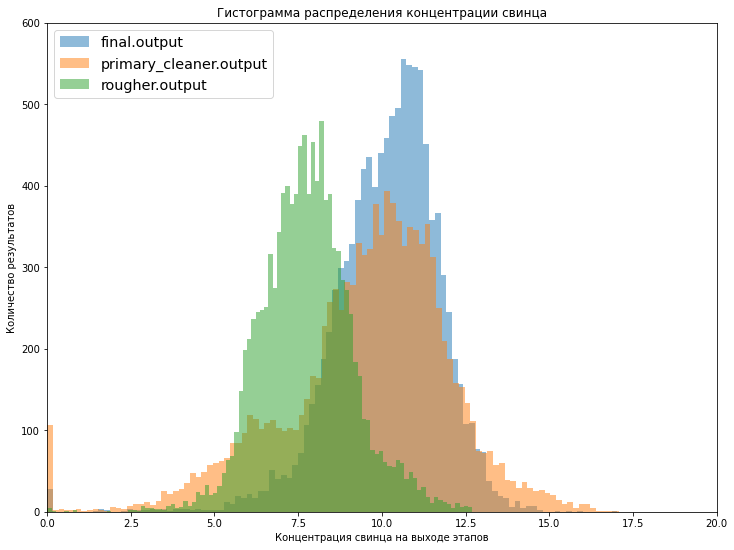

In [27]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_gold_recovery_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_gold_recovery_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner. И потом усредняется. Это может быть связано с химическим особенностями процесса очищения золота. При использовании азотнокислого выщелачивания в концентрате образуется много сульфата свинца. Повышение концентрации свинца в целом происходит не только из-за этого процесса, но также из-за очищения других составляющих из золотоносной руды.

Изучим размеры сырья на этапах обработки.
________________________________________________________________________________________________________________________________

The lead concentration rises from the rougher stage to the primary_cleaner. And then it averages out. This may be due to the chemical features of the gold refining process. When using nitric acid leaching, a lot of lead sulfate is formed in the concentrate. The increase in lead concentration in general is not only due to this process, but also due to the purification of other constituents from the gold ore.

We will study the dimensions of raw materials at the stages of processing.

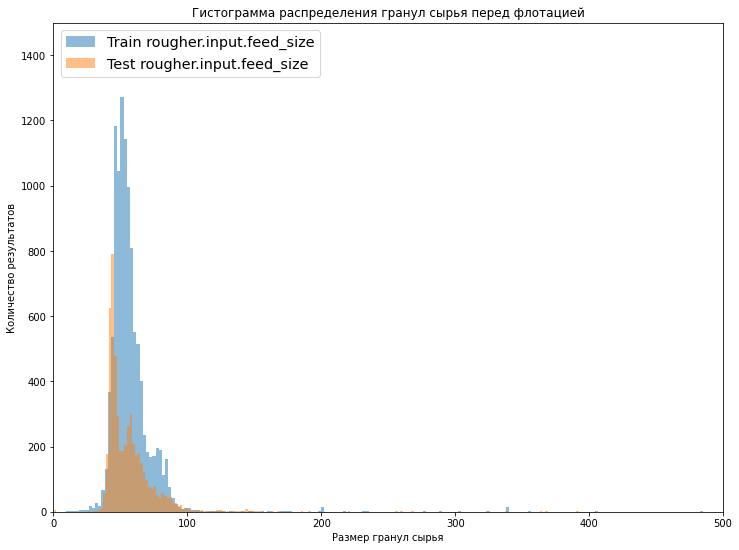

In [28]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(good_gold_recovery_test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1500])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул до флотации похоже на нормальное со смещением вправо как в обучающей, так и в тестовой выбрке. Существует хвост справа - много выбросов после размера гранул 100.

The distribution of granules before flotation is similar to normal with a shift to the right in both the training and test samples. There is a tail on the right - many outliers after grain size 100.

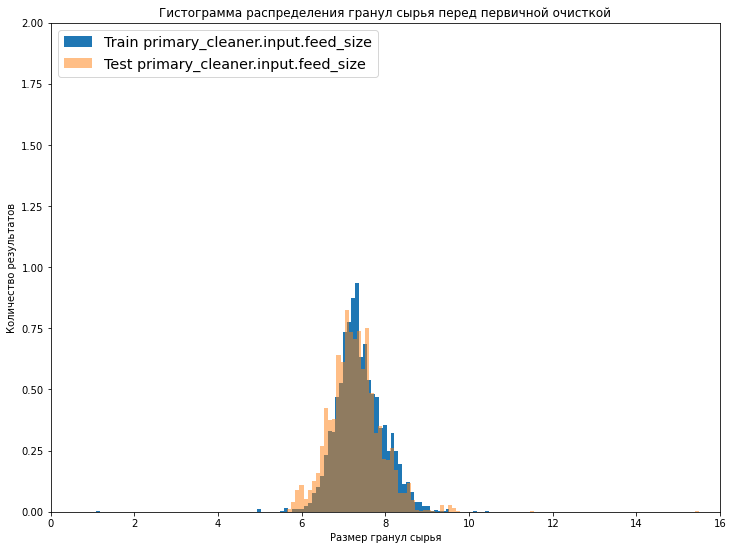

In [10]:
plt.figure(figsize=[12,9])

plt.hist(good_gold_recovery_train['primary_cleaner.input.feed_size'], bins=100,label = 'Train primary_cleaner.input.feed_size', density=True)
plt.hist(good_gold_recovery_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5, density=True)

plt.xlim([0, 16])
plt.ylim([0, 2])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Размеры гранул перед первичной очисткой близки к нормальному распределению.

The sizes of granules before primary cleaning are close to normal distribution.

Подготовим столбцы с концентрациями всех веществ.

Prepare columns with the concentrations of all substances.

In [11]:
rougher_input_feed_sum_train = (good_gold_recovery_train['rougher.input.feed_au'] + 
                                        good_gold_recovery_train['rougher.input.feed_ag'] + 
                                        good_gold_recovery_train['rougher.input.feed_pb'] +
                                        good_gold_recovery_train['rougher.input.feed_sol'])

primary_output_concentrate_sum_train = (good_gold_recovery_train['rougher.output.concentrate_au'] + 
                                                good_gold_recovery_train['rougher.output.concentrate_ag'] + 
                                                good_gold_recovery_train['rougher.output.concentrate_pb'] +
                                                good_gold_recovery_train['rougher.output.concentrate_sol'])

final_output_concentrate_sum_train = (good_gold_recovery_train['final.output.concentrate_au'] + 
                                      good_gold_recovery_train['final.output.concentrate_ag'] + 
                                      good_gold_recovery_train['final.output.concentrate_pb'] +
                                      good_gold_recovery_train['final.output.concentrate_sol'])

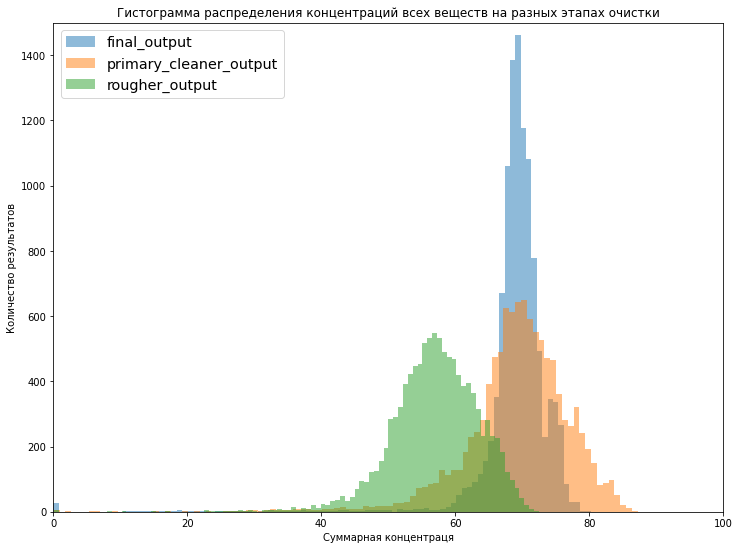

In [31]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_input_feed_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций всех веществ на разных этапах очистки")
plt.show()

По графику видно, что из аномалий много значений в 0. Рассмотрим их поподробнее.

It can be seen from the graph that there are many values in 0 among the anomalies. Let's consider them in more detail.

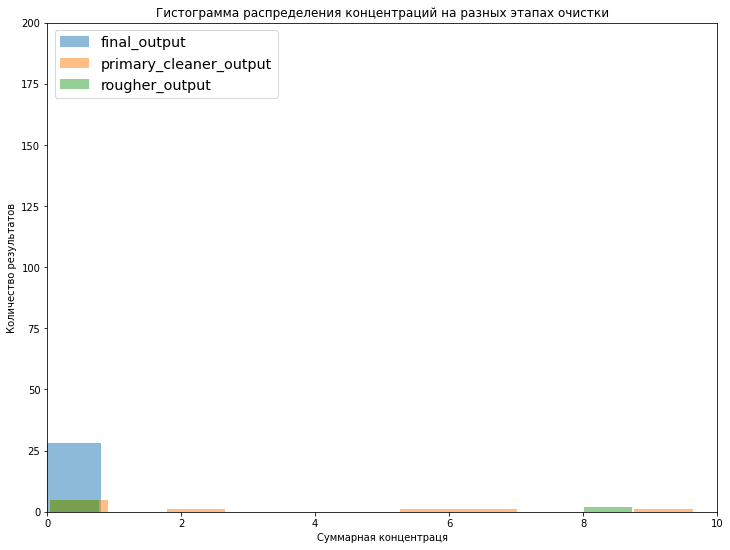

In [32]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_input_feed_sum_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 10])
plt.ylim([0, 200])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

На этапе финальной обработки были найдены строки с нулевыми значениями в final_output. Эти же строки показывают суммарную концентрацию, равную 0. Соответственно они являются аномалией. Удалим их.

At the final processing stage, rows with null values were found in final_output. The same lines show a total concentration of 0. Accordingly, they are an anomaly. Let's delete them.

In [12]:
good_gold_recovery_train = good_gold_recovery_train.drop(good_gold_recovery_train[good_gold_recovery_train['final.output.concentrate_au'] == 0].index)
good_gold_recovery_train[good_gold_recovery_train['final.output.concentrate_au'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,


### Выводы по второму этапу

### Conclusions on the second stage

В результате анализа были изучены:

- Концетрации основных веществ на разных этапах очистки.
- Размер гранул тестовой и обучающей выборки.
- Суммарная концентрация веществ.

Аномалии были удалены. Данные готовы к обучению.
________________________________________________________________________________________________________________________________

As a result of the analysis, the following were studied:

- Concentrations of basic substances at different stages of purification.
- The size of the granules of the test and training samples.
- Total concentration of substances.

Anomalies have been removed. The data is ready for training.

## Модель

## Model

Создадим разделение признаков для предсказания rougher.output.recovery и final.output.recovery.

Let's create feature separation for rougher.output.recovery and final.output.recovery prediction.

In [46]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(good_gold_recovery_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = good_gold_recovery_train.drop(columns_to_delete, axis=1)

columns_to_delete_2 = set(train_features_final.columns) - set(test_features_final.columns) 
train_features_final = train_features_final.drop(columns_to_delete_2, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения всех столбцов из feateures в столбцах тестовой выборки
print(set(train_features_final.columns) - set(gold_recovery_test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'rougher.output.tail_sol', 'final.output.concentrate_au', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'final.output.tail_au', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'final.output.tail_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_sol', 'final.output.tail_sol', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'primary_cleaner.output.concentrate_pb', 'rougher.output.concentrate_pb', 'final.output.tail_pb', 'primary_cleaner.input.sulfate', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.recovery', 'primary_cleaner.output.tail_pb', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_ag', 'rougher.calculation

Подготовим целевой признак.

Let's prepare the target feature.

In [14]:
train_target_final = good_gold_recovery_train['final.output.recovery']
train_target_rougher = good_gold_recovery_train['rougher.output.recovery']

In [36]:
#train_target_final = good_gold_recovery_train.merge(gold_recovery_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'inner', on='date')
#train_target_rougher = good_gold_recovery_train.merge(gold_recovery_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'inner', on='date')

Подготовим признаки тестовой выборки.

Let's prepare the features of the test sample.

In [15]:
test_features = good_gold_recovery_test
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [42]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
columns_to_delete_2 = set(test_features_final.columns) - set(train_features_final.columns)
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)
test_features_final = test_features_final.drop(columns_to_delete_2, axis=1)

{'secondary_cleaner.state.floatbank3_b_air', 'primary_cleaner.state.floatbank8_c_air', 'rougher.input.feed_ag', 'secondary_cleaner.state.floatbank5_a_air', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank2_b_air', 'secondary_cleaner.state.floatbank6_a_level', 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank5_a_level', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank4_b_air', 'primary_cleaner.state.floatbank8_d_air', 'secondary_cleaner.state.floatbank3_b_level', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.input.depressant', 'secondary_cleaner.state.floatbank4_a_air', 'primary_cleaner.input.sulfate', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.flo

Функция вычисления симметричного среднего абсолютного процентного отклонения.

A function for calculating the symmetric mean absolute percentage deviation.

In [17]:
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

Пишем функцию для подбора работы с моделями.

We write a function for selecting work with models.

In [18]:
def sMAPE (rougher_recovery_real, rougher_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE

In [22]:
#делаем скорер
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

Перед нами стоит задача регресии. Выберем следующие модели для обучения, наиболее часто применяемые для решения подобных задач:

- Линейная регрессия
- DecisionTreeRegressor

Выполним поиск лучшей модели для предсказаний
________________________________________________________________________________________________________________________________
We are faced with the task of regression. We will choose the following models for training, which are most often used to solve such problems:

- Linear regression
-DecisionTreeRegressor

Let's search for the best model for predictions

In [21]:
%%time

model = LinearRegression()
print('Mean sMAPE of LinearRegression =', cross_val_score(model, train_features_final, train_target_final, 
                                                          cv=5, scoring=smape_scorer).mean())

Mean sMAPE of LinearRegression = 9.048488393299085
CPU times: user 427 ms, sys: 876 ms, total: 1.3 s
Wall time: 1.27 s


Для модели DecisionTreeRegressor применим метод GridSearchCV. В нем уже вложена кросс-валидация.

For the DecisionTreeRegressor model, the GridSearchCV method is applicable. Cross-validation is already nested in it.

In [31]:
%%time

model = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'max_depth':max_depth_list, 'random_state':[15062020]},
               {'max_depth':max_depth_list, 'random_state':[15062020]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(model, hyperparams, scoring=smape_scorer)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'max_depth': 14, 'random_state': 15062020}

Grid scores on development set:

9.510 (+/-1.618) for {'max_depth': 2, 'random_state': 15062020}
9.667 (+/-2.370) for {'max_depth': 4, 'random_state': 15062020}
9.334 (+/-2.254) for {'max_depth': 6, 'random_state': 15062020}
10.677 (+/-3.284) for {'max_depth': 8, 'random_state': 15062020}
11.980 (+/-2.243) for {'max_depth': 10, 'random_state': 15062020}
13.218 (+/-1.774) for {'max_depth': 12, 'random_state': 15062020}
14.537 (+/-4.589) for {'max_depth': 14, 'random_state': 15062020}
14.086 (+/-2.744) for {'max_depth': 16, 'random_state': 15062020}
14.254 (+/-3.189) for {'max_depth': 18, 'random_state': 15062020}
14.488 (+/-3.928) for {'max_depth': 20, 'random_state': 15062020}
9.510 (+/-1.618) for {'max_depth': 2, 'random_state': 15062020}
9.667 (+/-2.370) for {'max_depth': 4, 'random_state': 15062020}
9.334 (+/-2.254) for {'max_depth': 6, 'random_state': 15062020}
10.

Проверим лучшие модели по метрикам на созданной итоговой метрике sMAPE. 

Let's check the best models by metrics on the created final sMAPE metric.

In [52]:
rougher_recovery_real = gold_recovery_full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = gold_recovery_full.loc[test_features_final.index,'final.output.recovery']
print('Процент пропусков в общей выборке' ,rougher_recovery_real.isna().mean())
print('Процент пропусков в общей выборке',final_recovery_real.isna().mean())

Процент пропусков в общей выборке 0.0
Процент пропусков в общей выборке 0.0


In [47]:
# Код ревъюера.
train_features_final.shape , test_features_final.shape

((10988, 51), (5229, 51))

In [43]:
# Код ревъюера.
set(test_features_final.columns) - set(train_features_final.columns)

set()

In [32]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(max_depth=14, random_state=20222022)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))  

sMAPE для линейной регресии 9.119963525398086
sMAPE для DecisionTreeRegressor 14.196652089598206
CPU times: user 996 ms, sys: 300 ms, total: 1.3 s
Wall time: 1.24 s


Создадим константную модель на медианных значений. Изменим код функции для подсчета.

Let's create a constant model on median values. Let's change the function code for counting.

In [34]:
median_rougher_recovery = gold_recovery_full['rougher.output.recovery'].median()
median_final_recovery = gold_recovery_full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 8.731488475121877


Повторим получение sMAPE на тех же моделях.

Let's repeat obtaining sMAPE on the same models.

In [36]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(max_depth=14, random_state=20222022)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 9.119963525398086
sMAPE для DecisionTreeRegressor 14.196652089598206
sMAPE для медианной константной модели 8.731488475121877
CPU times: user 1.07 s, sys: 405 ms, total: 1.47 s
Wall time: 1.47 s


### Выводы по третьему этапу

### Conclusions on the third stage

Была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV.

Была отобрана лучшая модель - Линейная регрессия. Ее значение sMAPE самое низкое.
________________________________________________________________________________________________________________________________

A function was written to calculate sMAPE. Each model was examined for quality using cross-validation and GridSearchCV hyper parameter search methods.

The best model was selected - Linear Regression. Its sMAPE value is the lowest.

## Итоговые выводы

## Final conclusions

В ходе работы было выполнено:

- Подготовлены данные.
- Проведен исследовательский анализ данных.
- Построена и обучена модель.

Модель DecisionTreeRegressor  показала себя лучше. sMAPE показал 14.19. Если сравнивать с константной моделью, значение выигрывает (8.73 у константной модели).
________________________________________________________________________________________________________________________________

In the course of the work, the following was done:

- Prepared data.
- Conducted exploratory data analysis.
- Built and trained model.

The DecisionTreeRegressor model performed better. sMAPE showed 14.19. When compared with the constant model, the value wins (8.73 for the constant model).